In [1]:
from importlib import reload

import src.defect_free_dsm as blc
import src.disclination as disc

import numpy as np
from numpy import pi

import matplotlib.pyplot as plt

# Define Pauli and Gamma matrices for convenience
sigma_0 = np.array([[1, 0], [0, 1]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

gamma_1 = np.kron(sigma_x, sigma_z)
gamma_2 = np.kron(-sigma_y, sigma_0)
gamma_3 = np.kron(sigma_z, sigma_0)
gamma_4 = np.kron(sigma_x, sigma_x)
gamma_5 = np.kron(sigma_x, sigma_y)

norb = 4

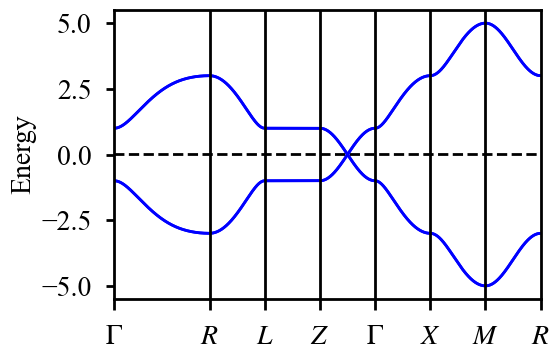

In [2]:
# Choose parameters and plot the band structure

nk = 50

k_ax = np.linspace(0, pi, nk + 1)[:-1]

q = pi / 2
b_xy = 1.0
g1 = 0.0
g2 = 0.0

c4_masses = (0.0, 0.0)

model_params = {'q' : q, 'b_xy' : b_xy, 'g1' : g1, 'g2' : g2, 'c4_masses': c4_masses}

blc.plot_band_structure(0.01, model_params, save=False)

delta = 2.0
phi = pi

In [38]:
e_min = -0.5
e_max = 0.5
e_pts = 200

energy_axis = np.linspace(e_min, e_max, e_pts)
de = energy_axis[1] - energy_axis[0]

eta = 0.5 * de

In [40]:
n_x = 13
n_kz = 100

ldos = disc.disc_ldos(energy_axis, eta, n_kz, n_x, model_params, None)

100%|██████████| 100/100 [05:54<00:00,  3.55s/it]


In [41]:
nk = 50

dos = blc.calculate_bloch_dos(energy_axis, eta, nk, model_params)

100%|██████████| 200/200 [02:00<00:00,  1.66it/s]


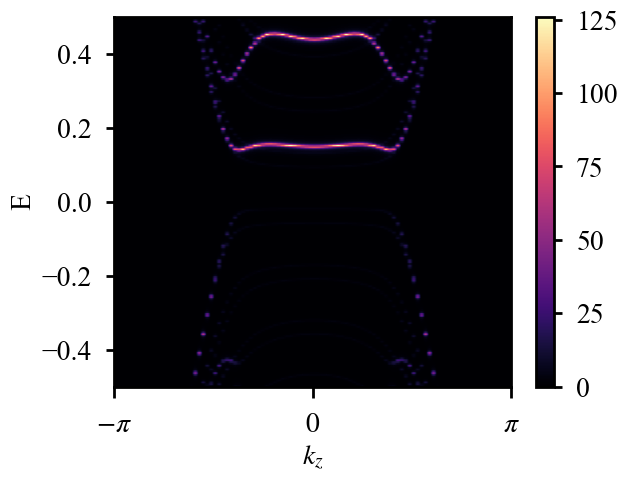

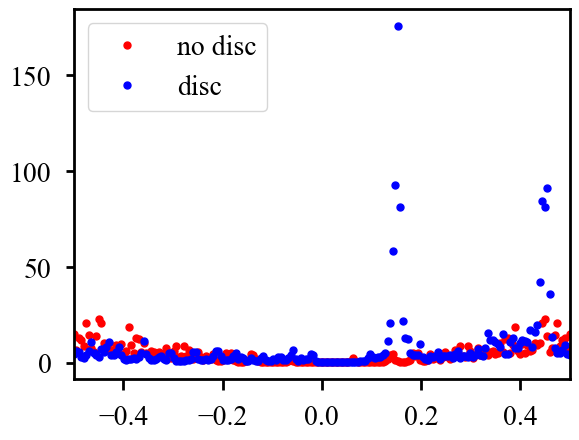

In [42]:
thresh = n_x // 2 - 2

core_ldos = disc.disc_bound_ldos(n_x, thresh, ldos, exclude_core=False)
n_kz = core_ldos.shape[-1]
dk =  2 * pi / n_kz

fig, ax = plt.subplots()

c = ax.imshow(core_ldos, cmap='magma', aspect='auto', origin='lower', extent=(-pi, pi, e_min, e_max), vmin=0)

ax.set_ylabel('E')

ax.set_xticks([-pi, 0, pi])
ax.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax.set_xlabel(r'$k_z$')

cbar = plt.colorbar(c)

fig, ax = plt.subplots()

ax.plot(energy_axis, dos, 'ro', markersize=5, label='no disc')
ax.plot(energy_axis, np.sum(core_ldos, axis=-1) * dk, 'bo', markersize=5, label='disc')

ax.legend()
plt.show()